<a href="https://colab.research.google.com/github/BryanZhong/Machine_Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.optimizers import SGD

Load the iris dataset -3 classes- Setosa, versicolour, virginica

In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

Split the dataset into training, validation and testing sets

In [3]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
print("Number of data points:")
print("X_train:", X_train.shape[0])
print("X_temp:", X_temp.shape[0])
print("X_val:", X_val.shape[0])
print("X_test:", X_test.shape[0])

Number of data points:
X_train: 105
X_temp: 45
X_val: 22
X_test: 23


ANN model - 2 layer NN(1 hidden layer)

In [5]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Hidden layer with 64 units
model.add(Dense(units=32, activation='relu'))  # Additional hidden layer with 32 units
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=26, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=22, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Output layer with 3 units (multiclass classification)

In [6]:
#compile the model
sgd = SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


Train the model

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4/4 [==============================] - 8s 158ms/step - loss: 1.1396 - accuracy: 0.2952 - val_loss: 1.0395 - val_accuracy: 0.5909
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 1.1078 - accuracy: 0.2952 - val_loss: 1.0226 - val_accuracy: 0.5909
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 1.0862 - accuracy: 0.2952 - val_loss: 1.0071 - val_accuracy: 0.5909
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 1.0639 - accuracy: 0.3048 - val_loss: 0.9911 - val_accuracy: 0.5909
Epoch 5/10
4/4 [==============================] - 0s 53ms/step - loss: 1.0503 - accuracy: 0.3714 - val_loss: 0.9721 - val_accuracy: 0.6818
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 1.0395 - accuracy: 0.4762 - val_loss: 0.9599 - val_accuracy: 0.7273
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 1.0286 - accuracy: 0.6476 - val_loss: 0.9529 - val_accuracy: 0.7727
Epoch 8/10
4/4 [==========

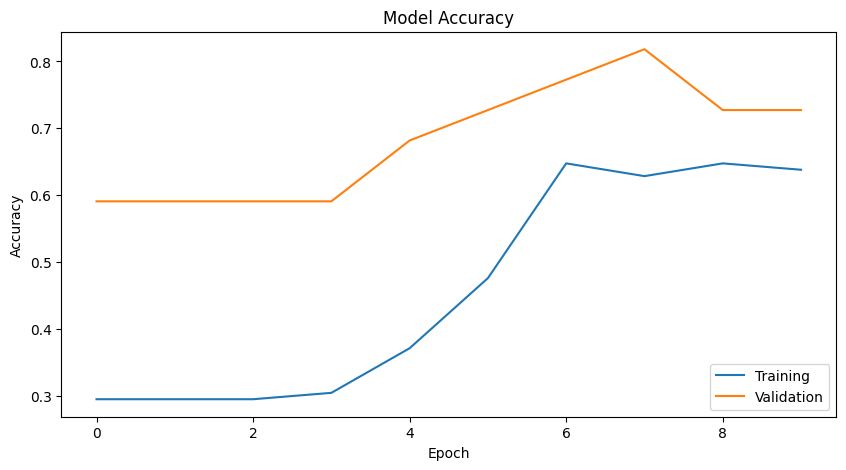

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

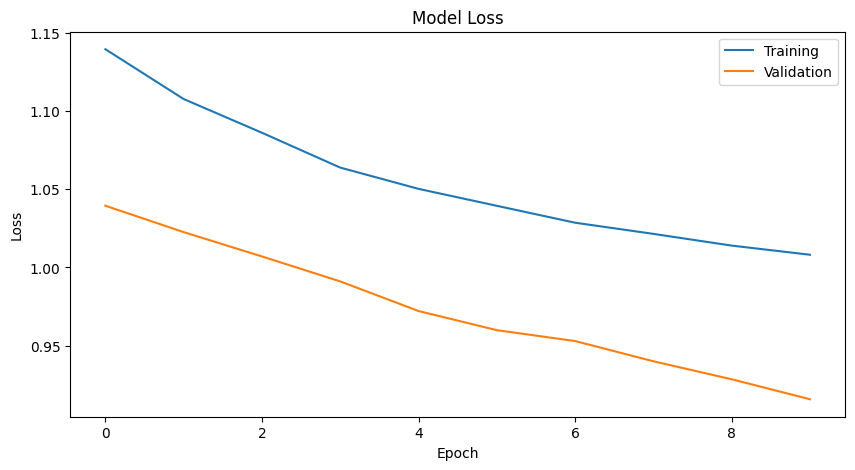

In [9]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [10]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 70ms/step - loss: 1.0105 - accuracy: 0.4783
Test Loss: 1.0105081796646118
Test Accuracy: 0.47826087474823


In [11]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 194ms/step


In [12]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)
classification_report = classification_report(y_test, y_pred_labels)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report)

Confusion Matrix:
[[6 0 0]
 [9 0 1]
 [2 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52         6
           1       0.00      0.00      0.00        10
           2       0.83      0.71      0.77         7

    accuracy                           0.48        23
   macro avg       0.40      0.57      0.43        23
weighted avg       0.35      0.48      0.37        23



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


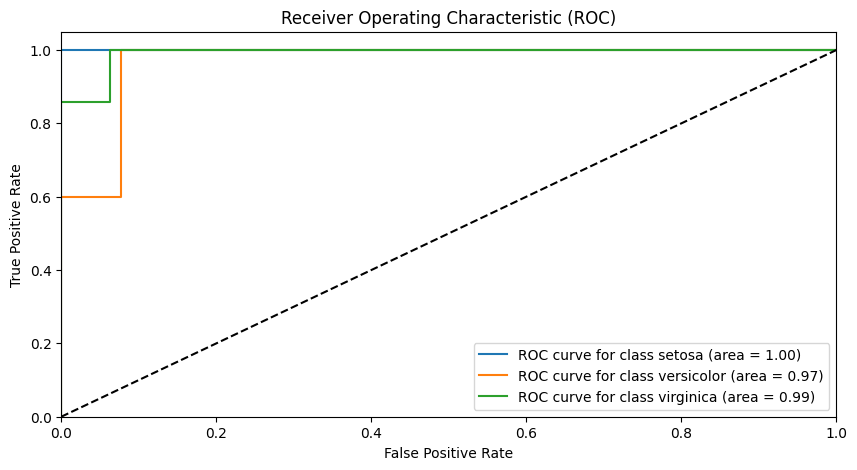

In [13]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_pred_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 5))
for i in range(len(data.target_names)):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class %s (area = %0.2f)' % (data.target_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

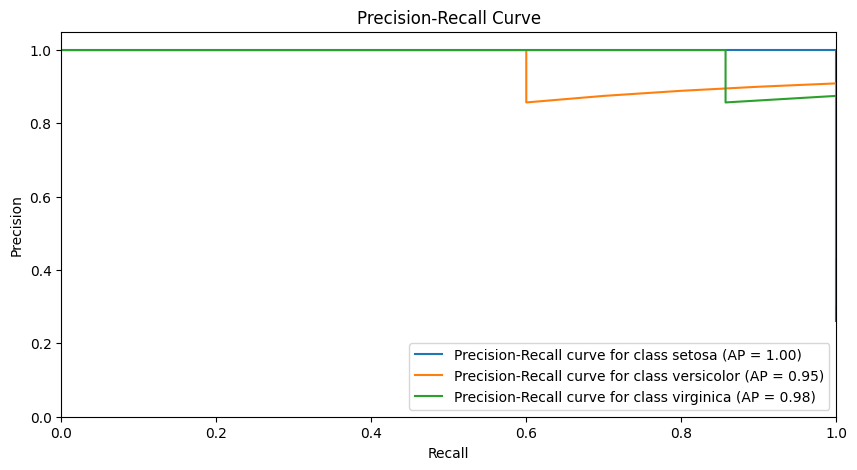

In [14]:
# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = y_pred[:, i]
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary, y_pred_binary)
    average_precision[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 5))
for i in range(len(data.target_names)):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve for class %s (AP = %0.2f)' % (data.target_names[i], average_precision[i]))
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Compute confusion matrix, sensitivity, and specificity for each class
sensitivity = dict()
specificity = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = np.where(y_pred_labels == i, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
    sensitivity[i] = tp / (tp + fn)
    specificity[i] = tn / (tn + fp)

# Print sensitivity and specificity for each class
for i in range(len(data.target_names)):
    print("Class", data.target_names[i])
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print()

Class setosa
Sensitivity: 1.0
Specificity: 0.35294117647058826

Class versicolor
Sensitivity: 0.0
Specificity: 1.0

Class virginica
Sensitivity: 0.7142857142857143
Specificity: 0.9375



In [16]:
from sklearn.metrics import f1_score

# Compute F1 score for each class
f1_scores = {}
for i in range(len(data.target_names)):
    f1_scores[data.target_names[i]] = f1_score(y_test == i, y_pred_labels == i)

# Print F1 score for each class
for class_name, f1 in f1_scores.items():
    print("Class:", class_name)
    print("F1 Score:", f1)
    print()

Class: setosa
F1 Score: 0.5217391304347826

Class: versicolor
F1 Score: 0.0

Class: virginica
F1 Score: 0.7692307692307692



In [17]:
# Compute sensitivity and specificity
true_positive = np.diag(confusion)
false_positive = np.sum(confusion, axis=0) - true_positive
false_negative = np.sum(confusion, axis=1) - true_positive
true_negative = np.sum(confusion) - (true_positive + false_positive + false_negative)
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

In [18]:
# Compute precision for each class
precision_per_class = true_positive / (true_positive + false_positive)

<ipython-input-18-3e73bd2a5570>:2: RuntimeWarning: invalid value encountered in true_divide
  precision_per_class = true_positive / (true_positive + false_positive)


In [19]:
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("Precision per class:", precision_per_class)

Confusion Matrix:
[[6 0 0]
 [9 0 1]
 [2 0 5]]
Sensitivity: [1.         0.         0.71428571]
Specificity: [0.35294118 1.         0.9375    ]
F1 Score: <function f1_score at 0x7fd8d4128700>
Precision per class: [0.35294118        nan 0.83333333]
